# Strategy Learner


---

This notebook provides an example of how a StrategyLearner works. This code is also available in the `__main__` function of `StrategyLearner.py`.

## Summary

We choose the CME S&P 500 E-mini futures (ES) contract, with an in-sample and an out-of-sample period. We will train a StrategyLearner on the data from the in-sample period and test it on the out-of-sample period. Then we will show the performances of the portfolio (only consisting of the ES futures contract) and a benchmark usinf the VIX for both periods. The Benchmark is The performance of a portfolio starting with ``$``100,000 cash, investing in 5 futures contract of the CME S&P 500 E-mini (ES) futures contract and holding that position.

* In this notebook, we choose the CME S&P 500 Emini futures contract from 2019 to 2014.  The data is a continuous contract.
* The in sample/development period is from December 23, 2016 to April 3 2019. 
* The out of sample/testing period is September 11, 2014 to December 22 2016.
* Starting cash is ``$``100,000.
* Allowable positions are: 5 contracts Long, 5 contracts short, 0 shares.
* There is no limit on leverage.
* Transaction costs: Commission: $0.00, Impact: 0.0.

__*The performance of portfolio is better than benchmark in both periods!*__

## Table of contents:
[1) In-sample performance](#first)

[2) Out-of-sample performance](#second)

[3) Out-of-sample performance](#third)

Import relevant libraries and modules

In [1]:
import datetime as dt
import pandas as pd


from util import create_df_benchmark
from StrategyLearner import StrategyLearner
from marketsim import compute_portvals_single_symbol, market_simulator
from pandas.plotting import register_matplotlib_converters




Starting cash, symbol of interest, commission, and impact



|Month     | contract| date range              |
|----------|---------|-------------------------|
|March     | ESH2009 | 2009-03-19 to 2007-12-21|
|June      | ESM2009 | 2009-06-18 to 2008-03-20|
|September | ESU2009 | 2009-09-17 to 2008-06-20|
|December  | ESZ2009 | 2009-12-17 to 2008-09-19|





In [2]:
start_val = 100000
symbol = "ESFULL"
commission = 0.00
impact = 0.0
num_shares = 5

---
## 1) In-sample performance <a class="anchor" id="first"></a>

Show the performances of portfolio and benchmark in the in-sample period

Specify the start and end dates for this period

In [3]:
start_date = dt.datetime(2016, 12, 23)
end_date = dt.datetime(2019, 3, 14)

Get a dataframe of benchmark data. Benchmark is a portfolio starting with ``$``100,000, investing in 1000 shares of symbol and holding that position

In [4]:
df_benchmark_trades = create_df_benchmark(symbol, start_date, end_date, 
                                              num_shares)
print (df_benchmark_trades)

            Shares
Date              
2016-12-23       5
2019-03-14      -5


Create an instance of StrategyLearner and retrieve a trades dataframe via test_policy

1 -0.023187500000000028
2 -0.0065749999999999975
3 0.0035374999999999712
4 0.006587499999999968
5 0.010462500000000041
6 0.010462500000000041
7 0.010462500000000041
8 0.010462500000000041
9 0.010462500000000041
10 0.010462500000000041
11 0.010462500000000041
12 0.010462500000000041
13 0.010462500000000041
14 0.010462500000000041
15 0.010462500000000041
16 0.010462500000000041
17 0.010462500000000041
18 0.010462500000000041
19 0.010462500000000041
20 0.010462500000000041
21 0.010462500000000041


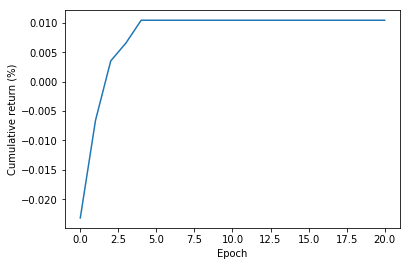

            Shares
Date              
2017-01-25       5
2017-01-26      -5
2017-02-02       5
2017-02-03      -5
2017-03-21      -5
2017-04-20       5
2017-04-28       5
2017-05-01      -5
2017-05-22       5
2017-05-23      -5
2017-06-23       5
2017-06-26      -5
2017-06-27       5
2017-06-28      -5
2017-06-29      -5
2017-07-12       5
2017-07-20       5
2017-07-21      -5
2017-08-10      -5
2017-08-14       5
2017-08-16      -5
2017-08-31       5
2017-09-01      -5
2017-09-05       5
2017-09-06      -5
2017-09-07       5
2017-11-14       5
2017-11-15      -5
2017-11-17      -5
2017-11-20       5
2017-11-21       5
2017-11-22      -5
2018-02-02      -5
2018-03-09       5
2018-03-21      -5
2018-04-20       5
2018-05-29      -5
2018-06-01       5
2018-06-25      -5
2018-06-28       5
2018-06-29      -5
2018-07-06       5
2018-07-10      -5
2018-07-11       5
2018-09-06       5
2018-09-07      -5
2018-09-26       5
2018-09-27      -5
2018-10-05      -5
2018-10-08       5
2018-10-09  

In [5]:
# Train and test a StrategyLearner
# Set verbose to True will print out and plot the cumulative return for each training epoch
stl = StrategyLearner(num_shares=num_shares, impact=impact, 
                      commission=commission, verbose=True,
                      num_states=4000, num_actions=3)
stl.add_evidence(symbol=symbol, start_val=start_val, 
                 start_date=start_date, end_date=end_date)
df_trades = stl.test_policy(symbol=symbol, start_date=start_date,
                            end_date=end_date)
print (df_trades)

Retrieve performance stats via a market simulator

Performances during training period for ESFULL
Date Range: 2016-12-23 00:00:00 to 2019-03-14 00:00:00
Sharpe Ratio of Portfolio: 0.354979724080075
Sharpe Ratio of Benchmark : 0.74540894918218

Cumulative Return of Portfolio: 0.010462500000000041
Cumulative Return of Benchmark : 0.02761250000000004

Standard Deviation of Portfolio: 0.0009853167916023318
Standard Deviation of Benchmark : 0.0010807235328127679

Average Daily Return of Portfolio: 2.2033280386288583e-05
Average Daily Return of Benchmark : 5.074683257779249e-05

Final Portfolio Value: 101046.25
Final Benchmark Value: 102761.25


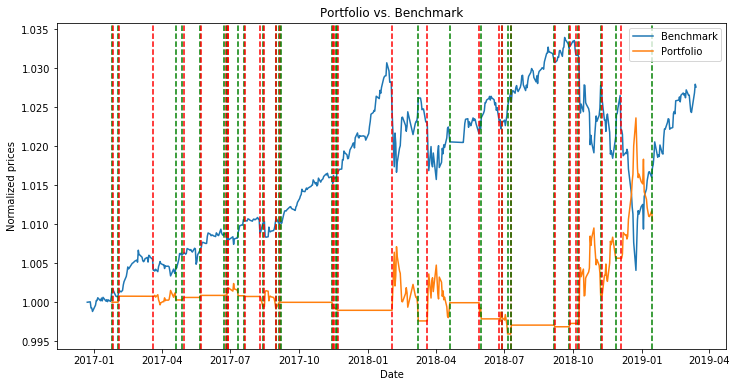

In [6]:
# Retrieve performance stats via a market simulator
print ("Performances during training period for {}".format(symbol))
print ("Date Range: {} to {}".format(start_date, end_date))
market_simulator(df_trades, df_benchmark_trades, symbol=symbol, 
                 start_val=start_val, commission=commission, impact=impact)

---
## 2) Out-of-sample performance <a class="anchor" id="second"></a>

Show the performances of portfolio and benchmark in the out-of-sample period

Specify the start and end dates for this period

In [7]:
start_val = 100000
symbol = "ESFULL"
commission = 0.00
impact = 0.0
num_shares = 5

In [8]:
start_date = dt.datetime(2014, 9, 11)
end_date = dt.datetime(2016, 12, 22)

Get a dataframe of benchmark data. Benchmark is a portfolio starting with ``$``100,000, investing in 1000 shares of symbol and holding that position.

In [9]:
df_benchmark_trades = create_df_benchmark(symbol, start_date, end_date, 
                                          num_shares)
print (df_benchmark_trades)

            Shares
Date              
2014-09-11       5
2016-12-22      -5


Use the same StrategyLearner trained above and retrieve a trades dataframe via test_policy

In [10]:
df_trades = stl.test_policy(symbol=symbol, start_date=start_date, 
                            end_date=end_date)
print (df_trades)

            Shares
Date              
2014-10-09      -5
2014-11-04       5
2014-11-05      -5
2014-11-06       5
2014-11-21      -5
2014-11-25       5
2014-11-26      -5
2014-12-01       5
2014-12-09      -5
2014-12-10       5
2014-12-12      -5
2014-12-18       5
2014-12-29      -5
2015-01-02       5
2015-01-05      -5
2015-01-09       5
2015-01-13      -5
2015-01-23       5
2015-01-26      -5
2015-02-02       5
2015-02-06      -5
2015-02-10       5
2015-02-20      -5
2015-02-25       5
2015-02-27      -5
2015-03-02       5
2015-03-10      -5
2015-03-19       5
2015-03-20      -5
2015-03-24       5
...            ...
2016-08-24      -5
2016-08-25       5
2016-08-26      -5
2016-08-29       5
2016-08-31      -5
2016-09-06       5
2016-09-09      -5
2016-09-21       5
2016-09-22      -5
2016-09-27       5
2016-09-28      -5
2016-09-29       5
2016-09-30      -5
2016-10-03       5
2016-10-04      -5
2016-10-05       5
2016-10-06      -5
2016-10-17       5
2016-10-18      -5
2016-10-19  

Retrieve performance stats via a market simulator


Performances during testing period for ESFULL
Date Range: 2014-09-11 00:00:00 to 2016-12-22 00:00:00
Sharpe Ratio of Portfolio: -1.0360166513279676
Sharpe Ratio of Benchmark : 0.3994068694186545

Cumulative Return of Portfolio: -0.02785000000000004
Cumulative Return of Benchmark : 0.013087499999999919

Standard Deviation of Portfolio: 0.0007878891011117672
Standard Deviation of Benchmark : 0.0009137856420857388

Average Daily Return of Portfolio: -5.141993912642583e-05
Average Daily Return of Benchmark : 2.2991091484351907e-05

Final Portfolio Value: 97215.0
Final Benchmark Value: 101308.75


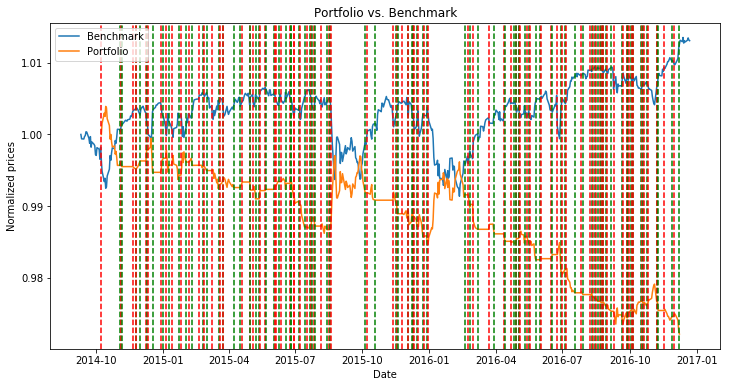

In [11]:
print ("\nPerformances during testing period for {}".format(symbol))
print ("Date Range: {} to {}".format(start_date, end_date))
market_simulator(df_trades, df_benchmark_trades, symbol=symbol, 
                 start_val=start_val, commission=commission, impact=impact)

---
## 3) Out-of-sample performance <a class="anchor" id="third"></a>

Show the performances of portfolio and benchmark in the out-of-sample period

Specify the start and end dates for this period
J7H2009
start_date = dt.datetime(2008, 3, 18)
end_date = dt.datetime(2009, 3, 16)

In [12]:
start_val = 100000
symbol = "SINE_FAST"
commission = 0.00
impact = 0.0
num_shares = 5

In [13]:
start_date = dt.datetime(2008, 12, 19)
end_date = dt.datetime(2010, 3, 19)

Get a dataframe of benchmark data. Benchmark is a portfolio starting with ``$``100,000, investing in 1000 shares of symbol and holding that position.

In [14]:
df_benchmark_trades = create_df_benchmark(symbol, start_date, end_date, 
                                          num_shares)
print (df_benchmark_trades)

            Shares
Date              
2008-12-19       5
2010-03-19      -5


Use the same StrategyLearner trained above and retrieve a trades dataframe via test_policy

In [15]:
df_trades = stl.test_policy(symbol=symbol, start_date=start_date, 
                            end_date=end_date)
print (df_trades)

            Shares
Date              
2009-01-27      -5
2009-02-02       5
2009-02-05      -5
2009-03-16       5
2009-03-17      -5
2009-03-24       5
2009-03-27       5
2009-03-30      -5
2009-04-06      -5
2009-04-13       5
2009-04-28      -5
2009-05-01       5
2009-05-08      -5
2009-06-15       5
2009-06-16      -5
2009-06-17       5
2009-06-18      -5
2009-06-24       5
2009-06-26       5
2009-06-29      -5
2009-07-07      -5
2009-07-13       5
2009-07-28      -5
2009-07-31       5
2009-08-05      -5
2009-08-06       5
2009-08-07      -5
2009-09-14       5
2009-09-15      -5
2009-09-16       5
2009-09-17      -5
2009-09-22       5
2009-09-24       5
2009-09-25      -5
2009-10-05      -5
2009-10-09       5
2009-10-26      -5
2009-10-29       5
2009-11-03      -5
2009-11-04       5
2009-11-05      -5
2009-12-21       5
2009-12-23       5
2009-12-24      -5
2010-01-04      -5
2010-01-08       5
2010-01-26      -5
2010-01-29       5
2010-02-04      -5
2010-02-18       5
2010-02-19  

Retrieve performance stats via a market simulator


Performances during testing period for SINE_FAST
Date Range: 2008-12-19 00:00:00 to 2010-03-19 00:00:00
Sharpe Ratio of Portfolio: 6.0073599239148185
Sharpe Ratio of Benchmark : -0.10736408855068925

Cumulative Return of Portfolio: 0.0029385940832200586
Cumulative Return of Benchmark : -7.486880478002611e-05

Standard Deviation of Portfolio: 2.6924274537596034e-05
Standard Deviation of Benchmark : 3.538935292794798e-05

Average Daily Return of Portfolio: 1.0188902181976212e-05
Average Daily Return of Benchmark : -2.393488764179521e-07

Final Portfolio Value: 100293.85940832201
Final Benchmark Value: 99992.513119522


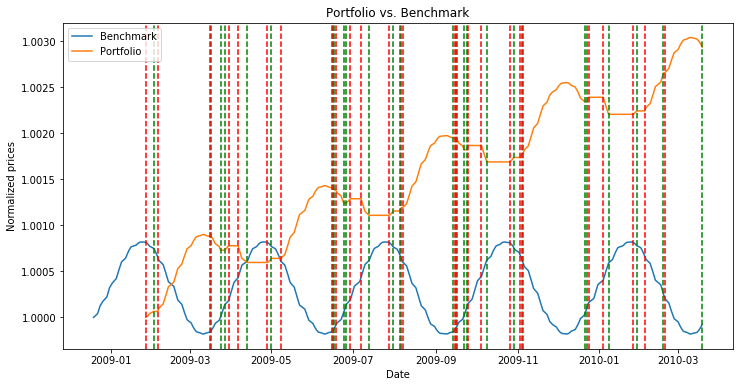

In [16]:
print ("\nPerformances during testing period for {}".format(symbol))
print ("Date Range: {} to {}".format(start_date, end_date))
market_simulator(df_trades, df_benchmark_trades, symbol=symbol, 
                 start_val=start_val, commission=commission, impact=impact)